In [2]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines

In [6]:
# Now analyse the results using 9PN for circular orbits

reader = eryn_HDF_Backend('../data_files/test_few.h5',read_only = True)

N_iterations = reader.get_chain()['model_0'].shape[0]
N_temps = reader.get_chain()['model_0'].shape[1]
N_walkers = reader.get_chain()['model_0'].shape[2]
N_params = reader.get_chain()['model_0'].shape[-1]

samples_after_burnin = [reader.get_chain(discard = 800)['model_0'][:,i].reshape(-1,N_params) 
                    for i in range(N_temps)]  # Take true chain]


log_like = reader.get_log_like(discard = 0)

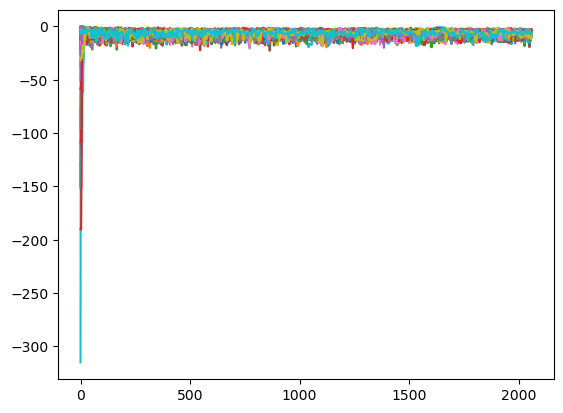

In [7]:
plt.plot(log_like[:,0,:]);plt.show()

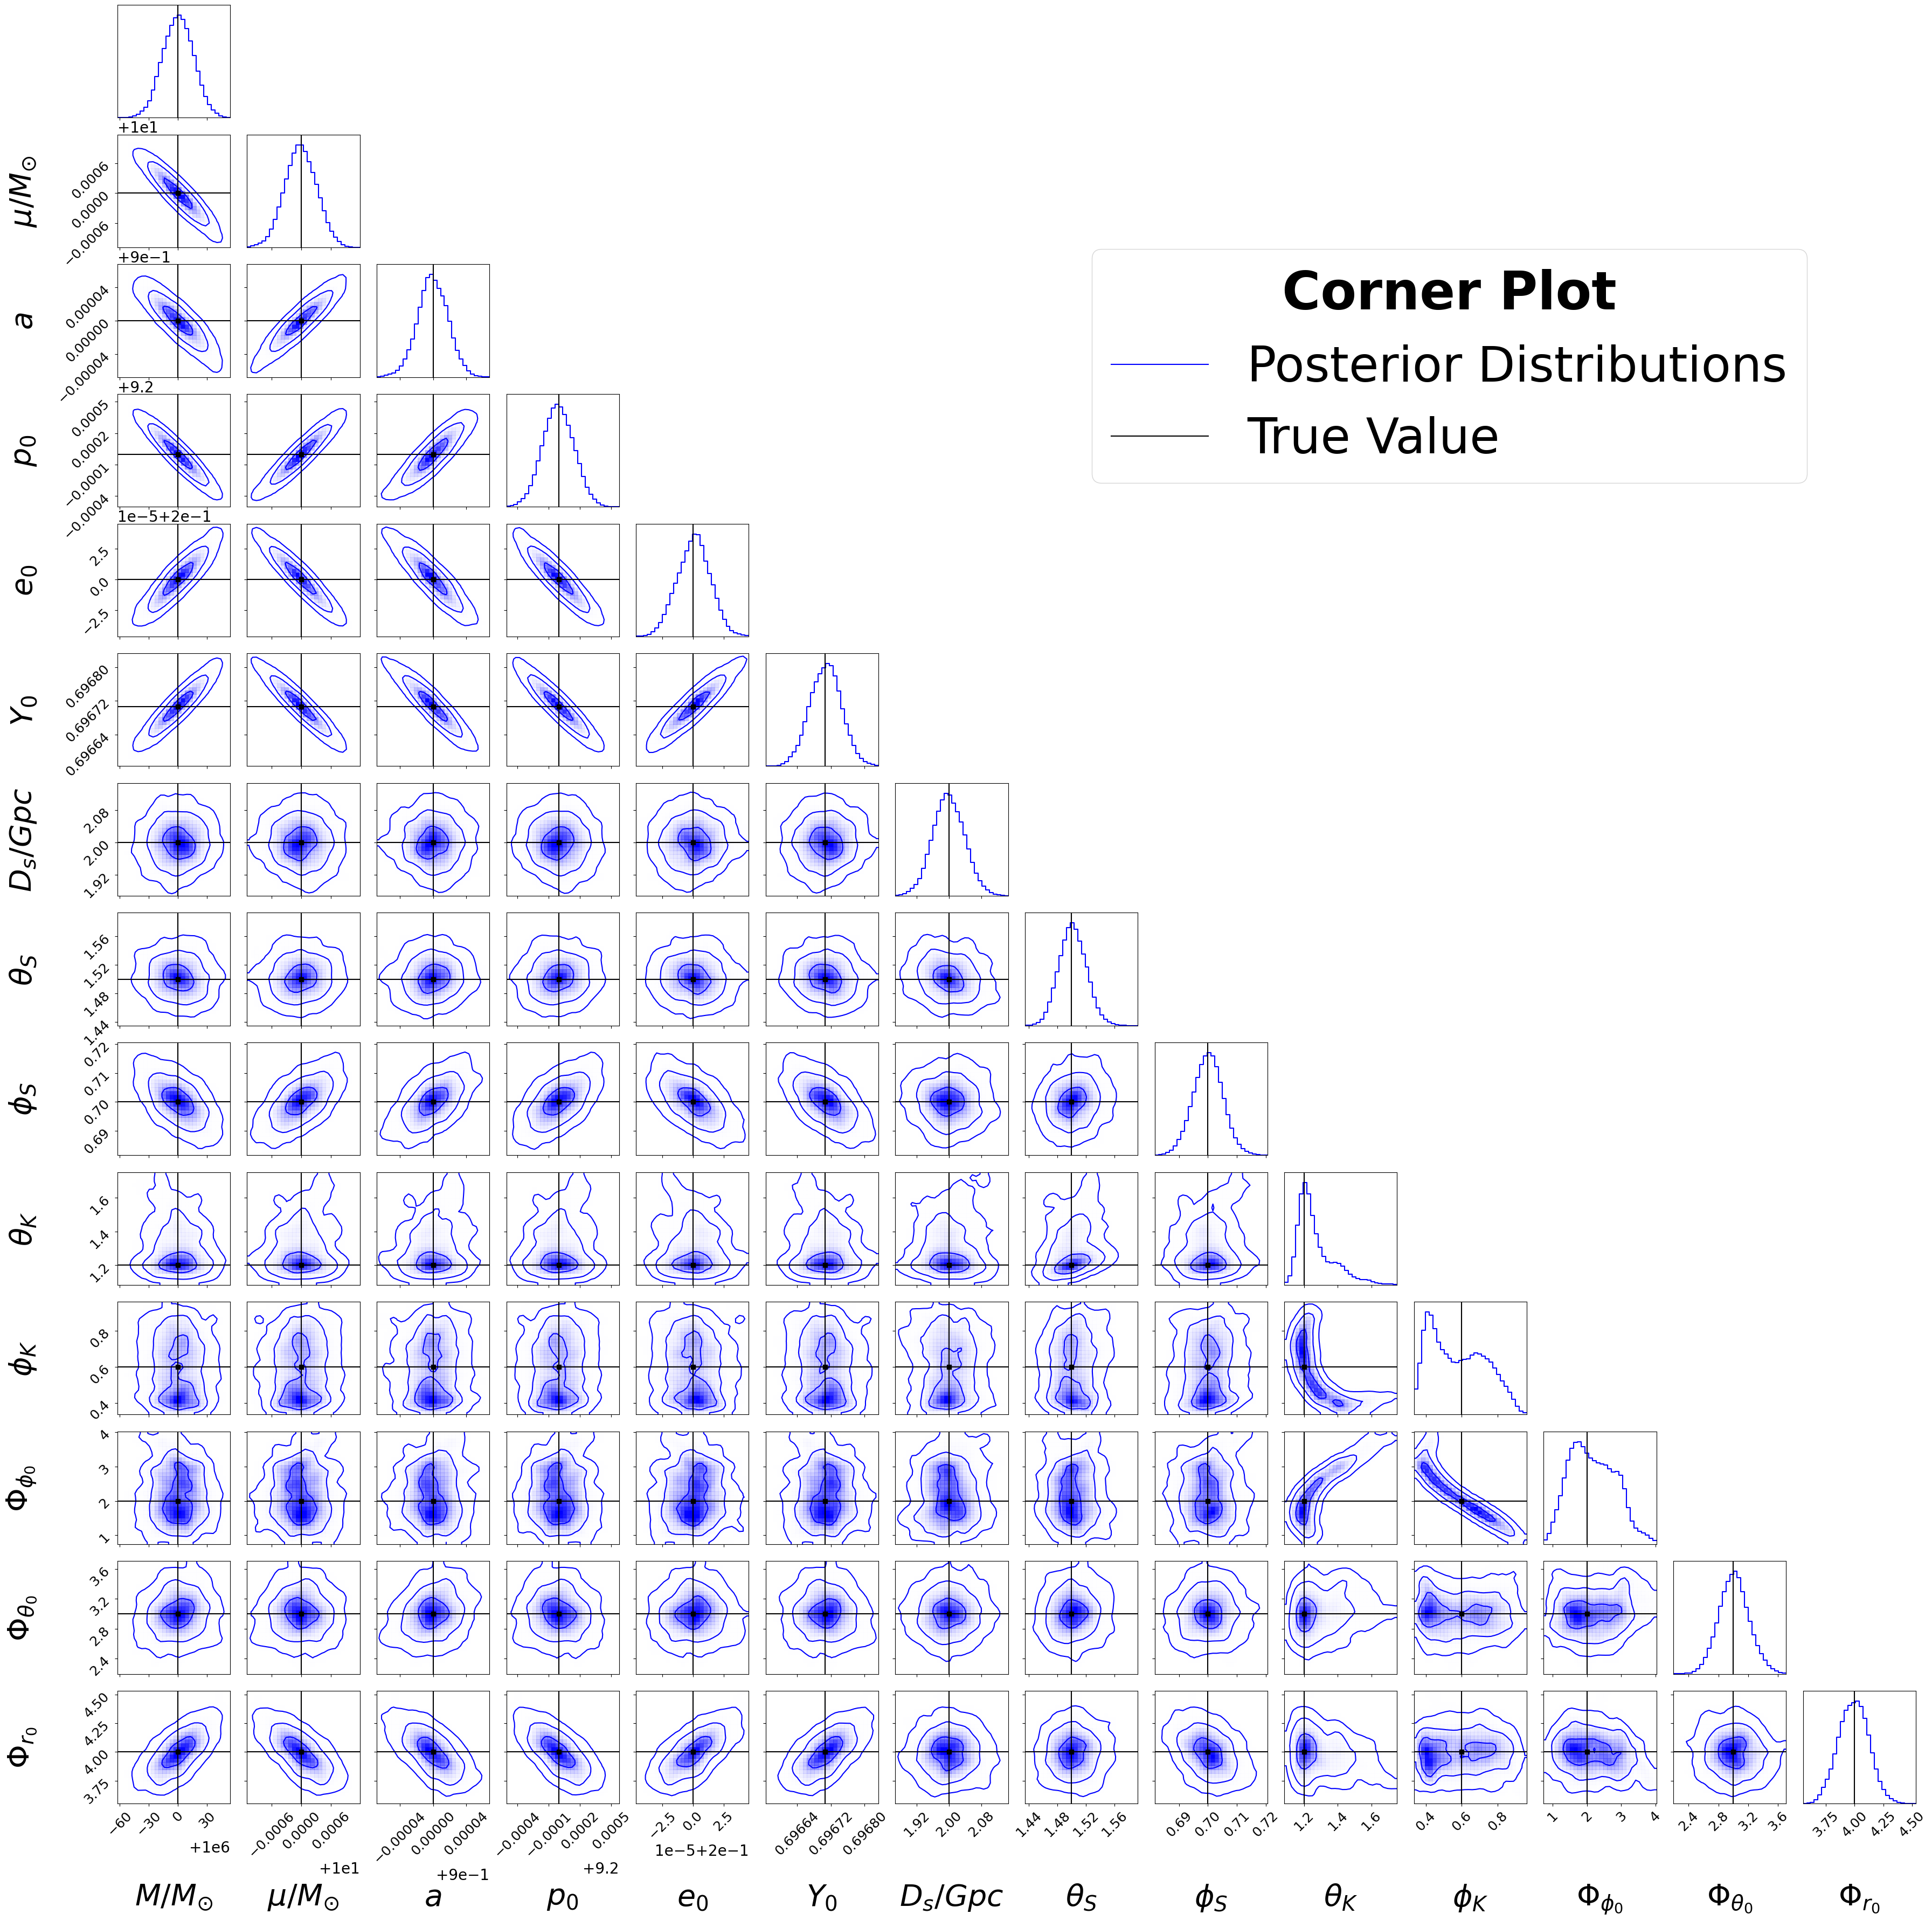

In [9]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

# Now check the corner plot, check all are gaussian.

params_corner =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$", r"$Y_{0}$", r"$D_{s}/Gpc$", 
                     r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
                     r"$\Phi_{\phi_{0}}$", r"$\Phi_{\theta_{0}}$", r"$\Phi_{r_{0}}$"] 

true_vals = np.array([1e6,10,0.9, 9.2, 0.2, np.cos(0.8),2.0, 1.5, 0.7, 1.2, 0.6, 2.0, 3.0, 4.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_corner, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)


samples_corner = np.column_stack(samples_after_burnin)

figure = corner.corner(samples_corner,bins = 30, color = 'blue', **corner_kwargs)

axes = np.array(figure.axes).reshape((N_params, N_params))

for i in range(N_params):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="k")
    
for yi in range(N_params):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="k")
        ax.axvline(true_vals[xi],color= "k")
        ax.plot(true_vals[xi], true_vals[yi], "sk")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)
  
blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
black_line = mlines.Line2D([], [], color='black', label='True Value')

plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = r"Corner Plot", title_fontproperties = FontProperties(size = 70, weight = 'bold'))
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)